# Objective: 

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

In [26]:
# Load Datasets 
sorteos_df = pd.read_csv('../Data/downloaded/sorteos_export.csv')
premios_df = pd.read_csv('../Data/downloaded/premios_export.csv')

In [27]:
# Join datasets by 'numero_sorteo'
df = pd.merge(premios_df, sorteos_df, on='numero_sorteo', how='inner')

# # Removing column "id"
df.drop(columns=['id'], inplace=True)


## Data imputation

In [28]:
# replace the null values with "N/A"
"""
Vendedor, ciudad and departamento are categorical variables, 
and filling them with N/A does not affect the analysis.
"""

df['vendedor'] = df['vendedor'].fillna("N/A")
df['ciudad'] = df['ciudad'].fillna("N/A")
df['departamento'] = df['departamento'].fillna("N/A")

# Save the new dataset for latter analysis in AWS QuickSight
df.to_csv('../Data/processed/data_combined.csv', index=False)

df

,numero_sorteo,numero_premiado,letras,monto,vendedor,ciudad,departamento,tipo_sorteo,fecha_sorteo,fecha_caducidad,primer_premio,segundo_premio,tercer_premio,reintegro_primer_premio,reintegro_segundo_premio,reintegro_tercer_premio
0,390,44,P,600.0,N/A,N/A,N/A,EXTRAORDINARIO,2024-06-08,2024-12-09,16780,46129,77885,0,9,5
1,390,80,DT,600.0,N/A,N/A,N/A,EXTRAORDINARIO,2024-06-08,2024-12-09,16780,46129,77885,0,9,5
2,390,129,TT,1000.0,N/A,N/A,N/A,EXTRAORDINARIO,2024-06-08,2024-12-09,16780,46129,77885,0,9,5
3,390,180,DT,600.0,N/A,N/A,N/A,EXTRAORDINARIO,2024-06-08,2024-12-09,16780,46129,77885,0,9,5
4,390,228,P,800.0,N/A,N/A,N/A,EXTRAORDINARIO,2024-06-08,2024-12-09,16780,46129,77885,0,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33938,3070,79344,P,600.0,N/A,N/A,N/A,ORDINARIO,2025-01-11,2025-07-11,4113,39820,52823,3,0,3
33939,3070,79440,PR,770.0,N/A,N/A,N/A,ORDINARIO,2025-01-11,2025-07-11,4113,39820,52823,3,0,3
33940,3070,79641,P,1000.0,N/A,N/A,N/A,ORDINARIO,2025-01-11,2025-07-11,4113,39820,52823,3,0,3
33941,3070,79820,TT,600.0,N/A,N/A,N/A,ORDINARIO,2025-01-11,2025-07-11,4113,39820,52823,3,0,3


## Double checking duplicates

In [29]:
df_duplicated = df.duplicated().sum()
print(df_duplicated)

0


## Check which draws has more than 1,000 winning numbers

In [30]:
sorteo_counts = df.groupby('numero_sorteo').size()

sorteos_mas_de_mil = sorteo_counts[sorteo_counts > 1000]

sorteos_mas_de_mil

numero_sorteo
390    1609
391    1978
392    1612
393    1611
394    1610
395    1610
396    2050
dtype: int64

## What is the Distribution Prize of Loteria Santa Lucia? (InterQuartile Range)

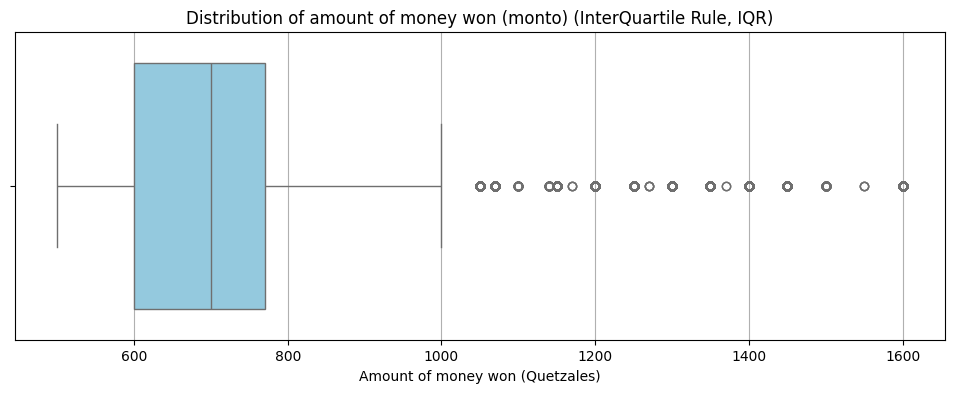

In [31]:
Q1 = df['monto'].quantile(0.25)
Q3 = df['monto'].quantile(0.75)
IQR = Q3 - Q1

# Filter values within the interquartile range
df_filtered_IQR = df[(df['monto'] >= Q1 - 1.5 * IQR) & (df['monto'] <= Q3 + 1.5 * IQR)]

plt.figure(figsize=(12, 4))

# Create boxplot without outliers
sns.boxplot(x=df_filtered_IQR['monto'], color='skyblue')
plt.title("Distribution of amount of money won (monto) (InterQuartile Rule, IQR)")
plt.xlabel("Amount of money won (Quetzales)")
plt.grid(axis='x')
plt.show()

So with this you can see that 50% of the prizes won are **between Q600.00 and almost Q800.00**
With a **median aprox of Q750.00**

I deciced to use the IQR (InterQuartile Rule) becuase the outliers of the "big prizes" are too high above 1,000,000 up to 5,000,000 making hard to see and understand where the mayor concentration is found.

## What is the distribution of the Winning Numbers of Loteria Santa Lucia?

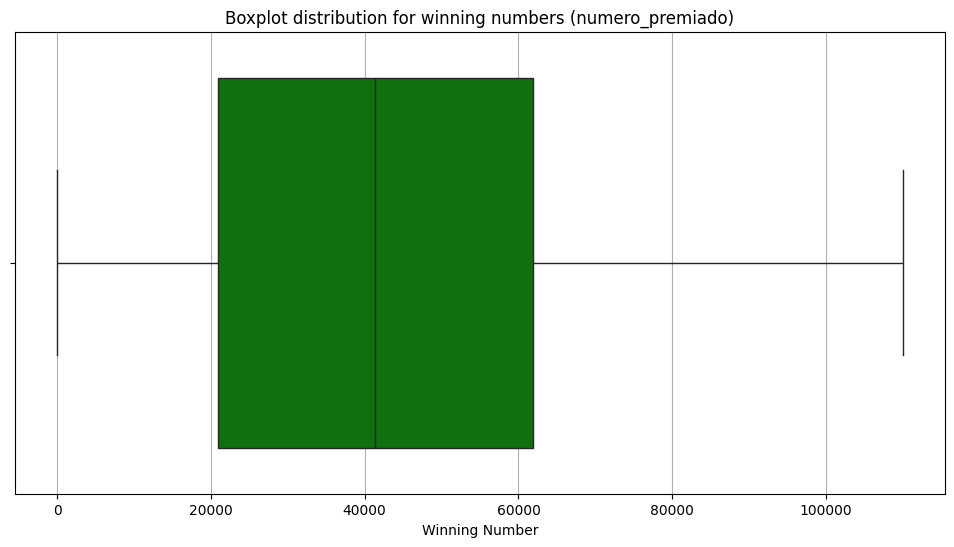

In [32]:
plt.figure(figsize=(12, 6))

# Create boxplot for the winning numbers
sns.boxplot(x=df['numero_premiado'], color='green')
plt.title('Boxplot distribution for winning numbers (numero_premiado)')
plt.xlabel('Winning Number')
plt.grid(axis='x')
plt.show()

So, in the boxplot you can see that **50%** of winning numbers are located **between 21,000 and 62,000** aprox.
With a **median of 42,000**

When talking about winning numbers I mean a number that has won any amount of money from the range of Q500 up to Q5,000,000

## What is the distribution for the Letter Combinations (letras) of Loteria Santa Lucia? 

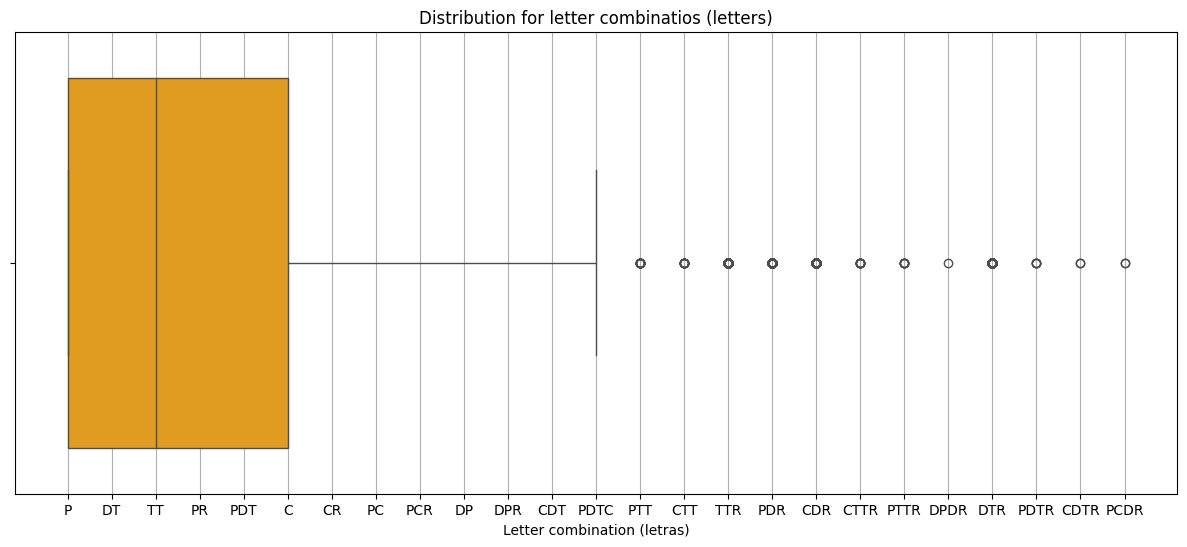

In [33]:
plt.figure(figsize=(15, 6))

# Create boxplot for letter distribution
sns.boxplot(x=df['letras'], color='orange')
plt.title('Distribution for letter combinatios (letters)')
plt.xlabel('Letter combination (letras)')
plt.grid(axis='x')
plt.show()

**What does this mean?**

50% of all letter combinations are located in: P, DT, TT, PR, PDT and C

Each letter stands for: 

**P:** Premio (Prize, won some money like Q600)

**DT:** Doble terminacion (if any of the 3 winning places finsihed with "55" any number that also finished with "55" will get some money)

**TT:** Triple Terminacion (if any of the 3 winning places finsihed with "756" any number that also finished with "756" will get some money)

**PR:** Premio y Reintegro (Prize and Refund, won some money and you get again a new ticket for next lottery)

**PDT:** Premio y Doble Terminacion (Won some money and fished with the last 2 numbers as the 1st, 2nd or 3rd place)

**C:** Centena (If the 1st, 2nd or 3thd place has a number like "55049" any number between 55000 and 55100 will get some money)

## Boxplot for numbers and letter combinations ('numeros_premiados', 'letras')

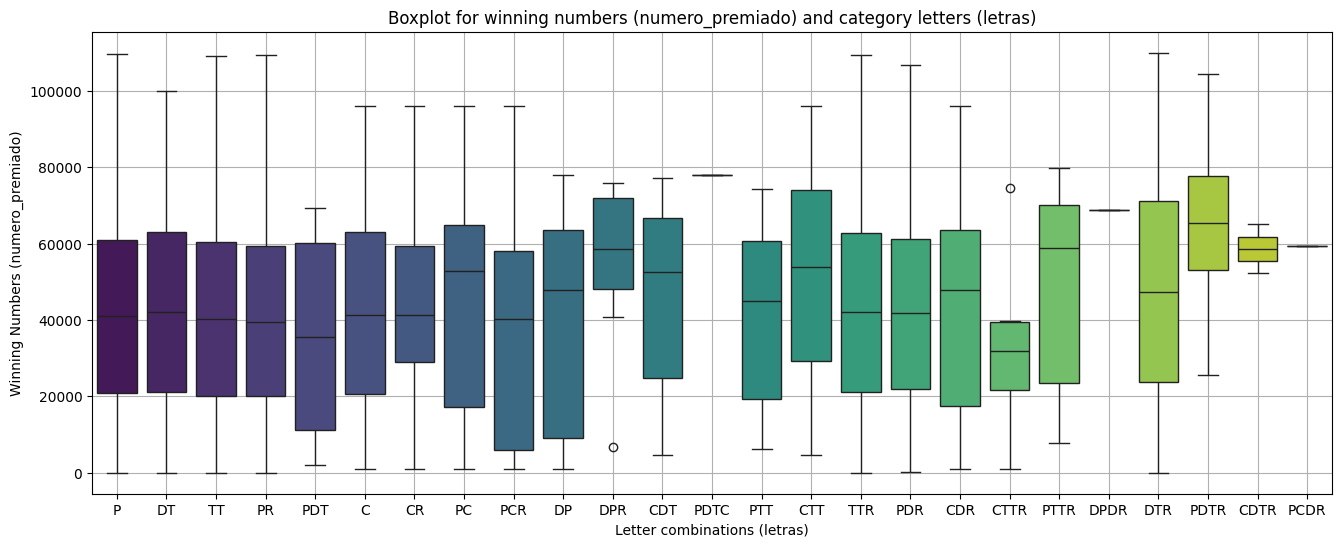

In [34]:
plt.figure(figsize=(16, 6))

# Boxplot by letters ('letras')
sns.boxplot(x='letras', y='numero_premiado', data=df, palette='viridis', hue='letras', dodge=False)

plt.title('Boxplot for winning numbers (numero_premiado) and category letters (letras)')
plt.xlabel('Letter combinations (letras)')
plt.ylabel('Winning Numbers (numero_premiado)')
plt.grid(True)
plt.show()

**What does this mean?**

Well, It means that the numbers with the letter comination for "p" a mostly located between 20,000 and 60,000 e.g. if you buy a ticket number with the number 40,000 good chances are that it will get the letter "p" (of course if you get some prize in lottery) 

## From all winning numbers which one is the "Luckiest" one?

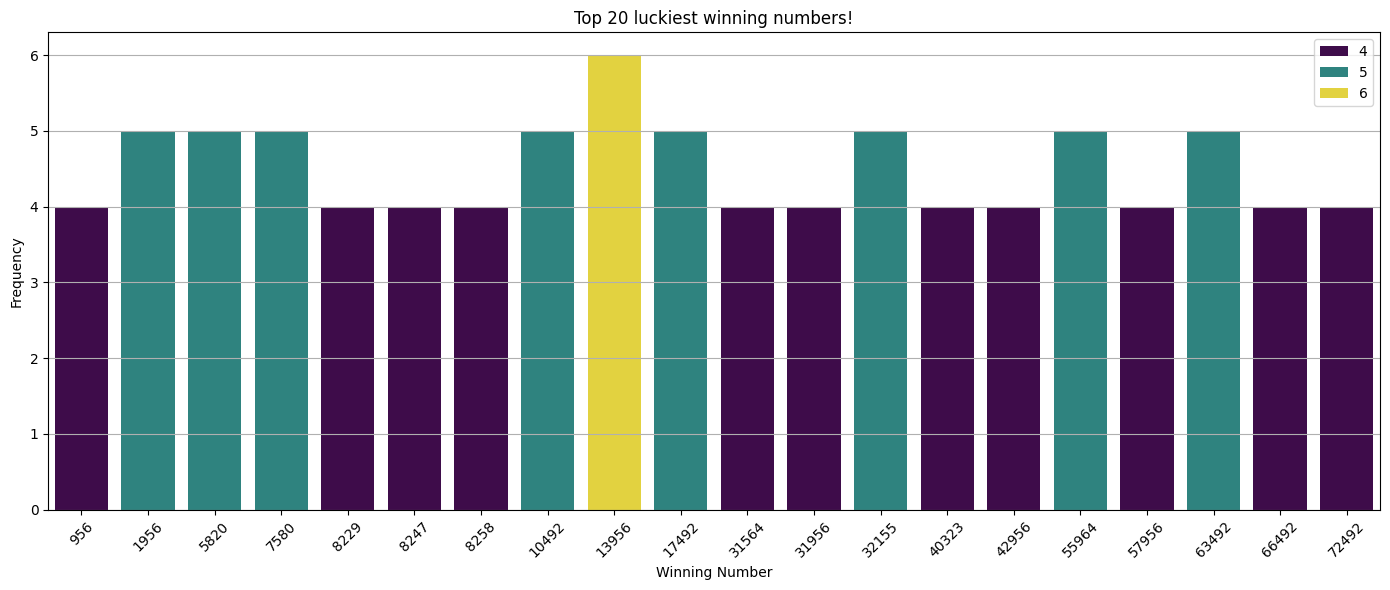

In [35]:
# Counting the frequency of each winning number across all draws
winning_numbers_frequency = df['numero_premiado'].value_counts().head(20)

# Plotting the top 10 most frequent winning numbers
plt.figure(figsize=(14, 6))
sns.barplot(x=winning_numbers_frequency.index, y=winning_numbers_frequency.values, palette='viridis', hue=winning_numbers_frequency.values)
plt.title("Top 20 luckiest winning numbers!")
plt.xlabel("Winning Number")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**What does this mean?**

In fact, this means that such numbers like: **13956** has won in **6 different times**, different prizes. Not necessary that won the first place but at least it won some money.

## Analyze Sales and Insights for the columns of the seler, city and department "vendedor", "ciudad" y "departamento"

In [36]:
df_filtered_vendedor_city_department = df[
    (df['vendedor'] != "N/A") &
    (df['ciudad'] != "N/A") &
    (df['departamento'] != "N/A")
]

### Top 10 seller with more winning numbers

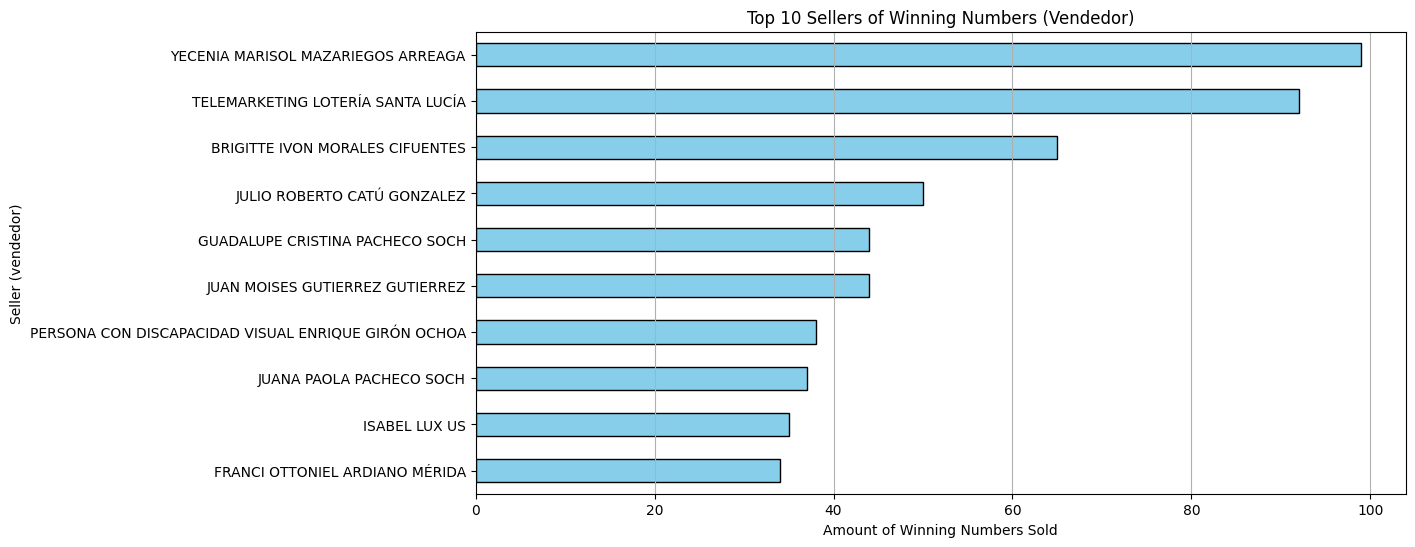

In [37]:
# top 10 seller with more winning numbers
top_10_vendedores = df_filtered_vendedor_city_department['vendedor'].value_counts()

plt.figure(figsize=(12, 6))
top_10_vendedores.head(10).iloc[::-1].plot(kind='barh', color='skyblue', edgecolor='black') # .iloc[::-1], invertion of the order of the dataset
plt.title("Top 10 Sellers of Winning Numbers (Vendedor)")
plt.ylabel("Seller (vendedor)")
plt.xlabel("Amount of Winning Numbers Sold")
plt.grid(axis='x')
plt.show()

So Ms. **Yecenia Mazariegos** is the top seller of winning numbers, even over the web page "Telemarketing Loteria Santa Lucia"! 


### Where are the top 10 sellers located? 

In [38]:
# Filter the top 10 sellers, get the Index of each one
top_10_sellers_index = top_10_vendedores.head(10).index

# Filter original dataframe for the top 10 sellers
top_10_sellers_data = df_filtered_vendedor_city_department[df_filtered_vendedor_city_department['vendedor'].isin(top_10_sellers_index)]

# Get a table of sellers and their cities
top_10_locations = top_10_sellers_data[['vendedor', 'ciudad']].drop_duplicates()
top_10_locations

,vendedor,ciudad
244,ISABEL LUX US,DE ESTA CAPITAL
359,TELEMARKETING LOTERÍA SANTA LUCÍA,DE ESTA CAPITAL
360,GUADALUPE CRISTINA PACHECO SOCH,DE ESTA CAPITAL
439,BRIGITTE IVON MORALES CIFUENTES,DE ESTA CAPITAL
463,YECENIA MARISOL MAZARIEGOS ARREAGA,DE QUETZALTENANGO
727,JULIO ROBERTO CATÚ GONZALEZ,DE ESTA CAPITAL
881,PERSONA CON DISCAPACIDAD VISUAL ENRIQUE GIRÓN ...,DE ESCUINTLA
961,JUANA PAOLA PACHECO SOCH,DE ESTA CAPITAL
1149,FRANCI OTTONIEL ARDIANO MÉRIDA,DE COATEPEQUE
4409,JUAN MOISES GUTIERREZ GUTIERREZ,DE ESCUINTLA


"De esta Capital" Means "Guatemala City"

## Top 10 cities with more winning numbers

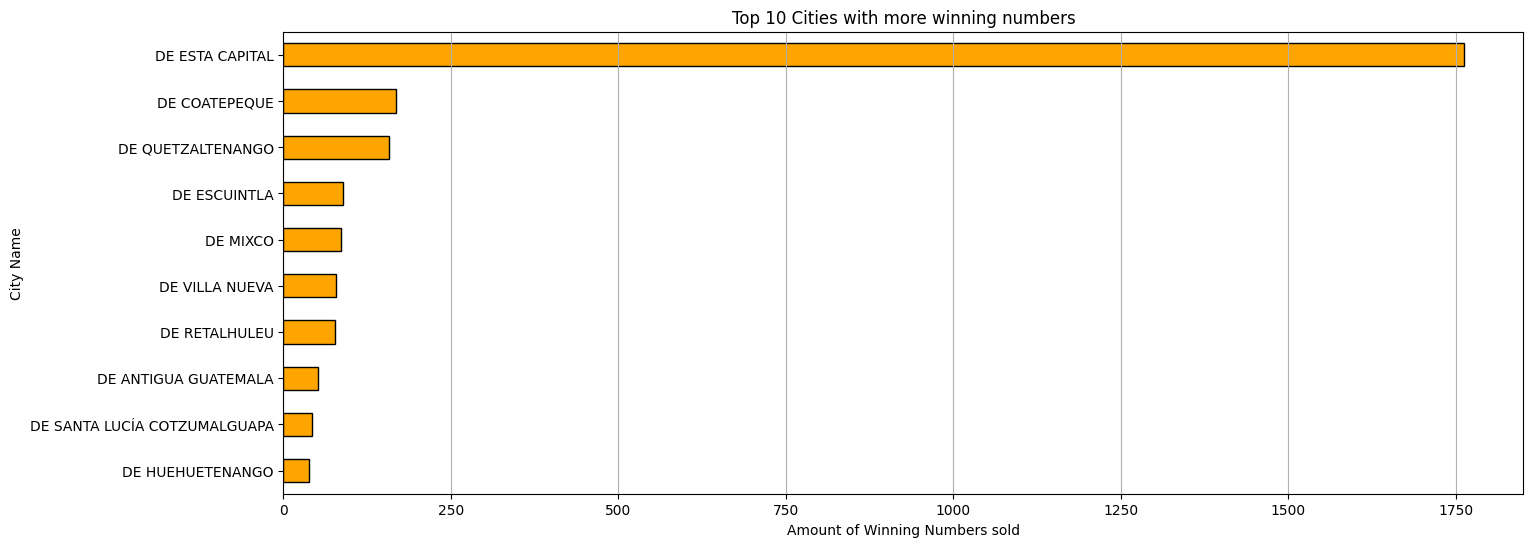

In [39]:
top_10_ciudades_loteria = df_filtered_vendedor_city_department['ciudad'].value_counts()

plt.figure(figsize=(16, 6))
top_10_ciudades_loteria.head(10).iloc[::-1].plot(kind='barh', color='orange', edgecolor='black')
plt.title("Top 10 Cities with more winning numbers")
plt.ylabel("City Name")
plt.xlabel("Amount of Winning Numbers sold")
plt.grid(axis='x')
plt.show()

**Remember: "De esta Capital" Means "Guatemala city"**

And as you may realize the amount of winning numbers sold in Guatemala city is by far the biggest one in all Loteria Santa Lucia from **June 2024 up to today.**

## What is the top 10 departments with more winning numbers sold? 

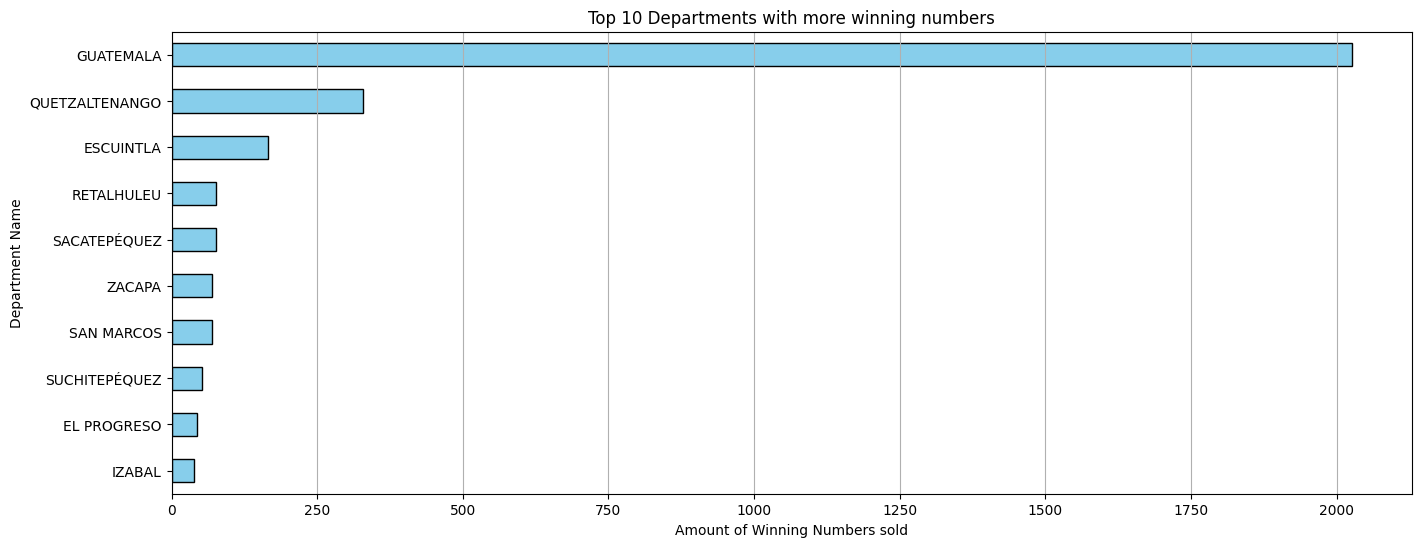

In [40]:
top_10_departamentos_loteria = df_filtered_vendedor_city_department['departamento'].value_counts()

plt.figure(figsize=(16, 6))
top_10_departamentos_loteria.head(10).iloc[::-1].plot(kind='barh', color='skyblue', edgecolor='black')
plt.title("Top 10 Departments with more winning numbers")
plt.ylabel("Department Name")
plt.xlabel("Amount of Winning Numbers sold")
plt.grid(axis='x')
plt.show()

At department level, **Guatemala** is still the largest one with almost 2,000 winning numbers sold, by far followed by **Quetzaltenando** and **Escuintla**.

## Distribution of all sellers (with winning numbers) by Department ['departamento']

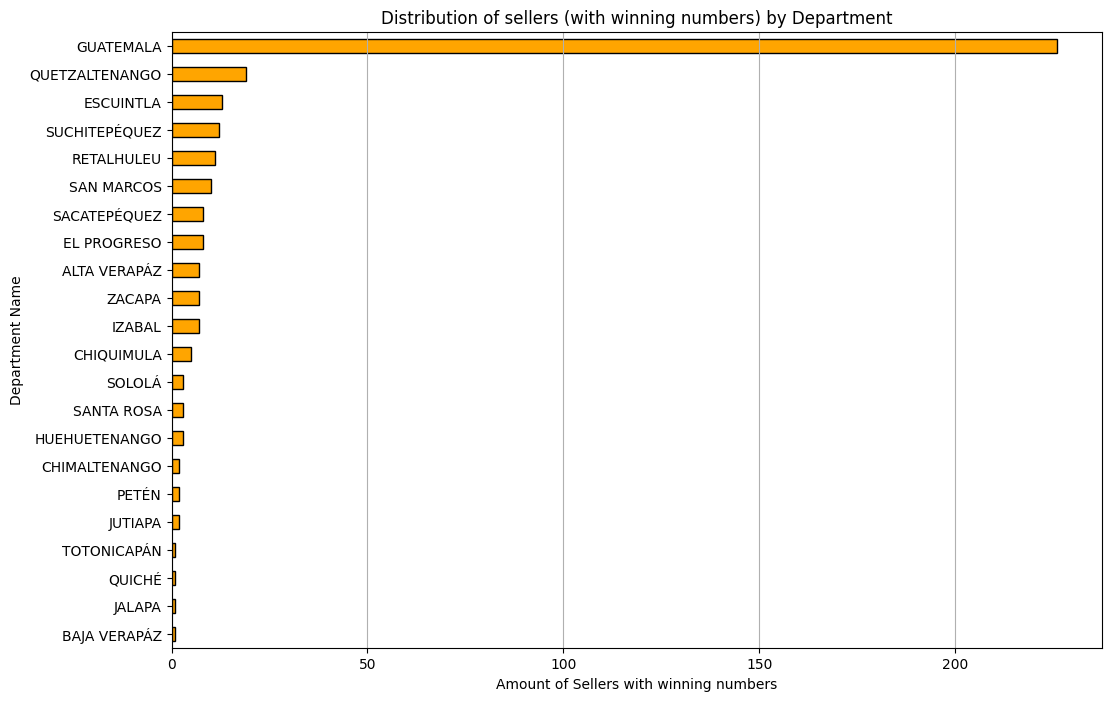

In [41]:
# Group sellers by department 
sellers_by_department = df_filtered_vendedor_city_department.groupby('departamento')['vendedor'].nunique()

# Sort departments with more sellers
sellers_by_department = sellers_by_department.sort_values(ascending=True)


# Graph for department with more sellers 
plt.figure(figsize=(12, 8))
sellers_by_department.plot(kind='barh', color='orange', edgecolor='black')
plt.title("Distribution of sellers (with winning numbers) by Department")
plt.xlabel("Amount of Sellers with winning numbers")
plt.ylabel("Department Name")
plt.grid(axis='x')
plt.show()

The department of **Guatemala** as the most sellers with winning numbers of all the list, with more than 200 sellers in all Guatemala department, just followed by **Quetzaltenango** and **Escuintla**

## What are the top 5 of most frequent Refounds? (Reintegros) by 1st, 2nd and 3thd place and in General

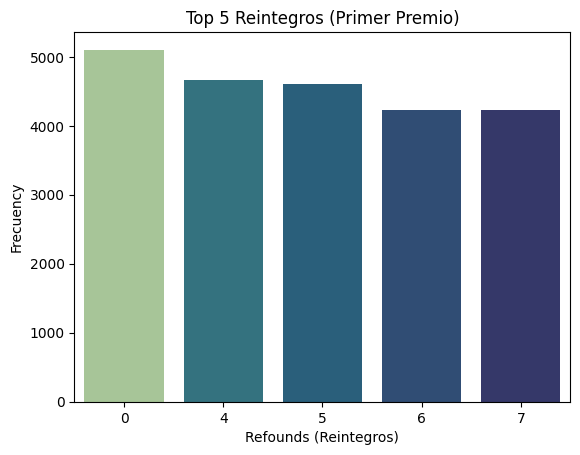

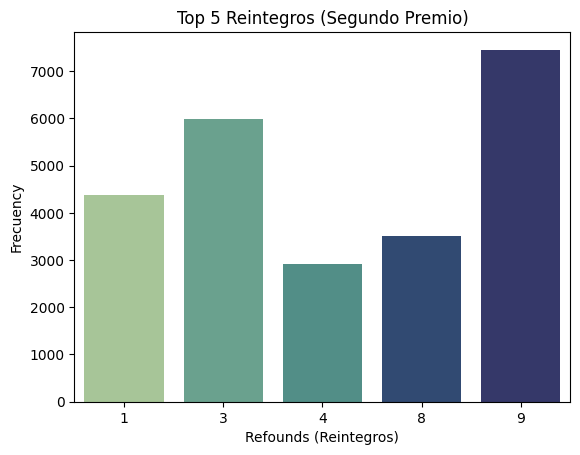

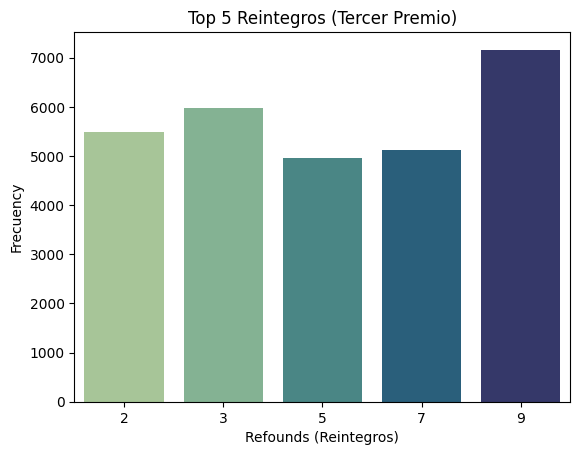

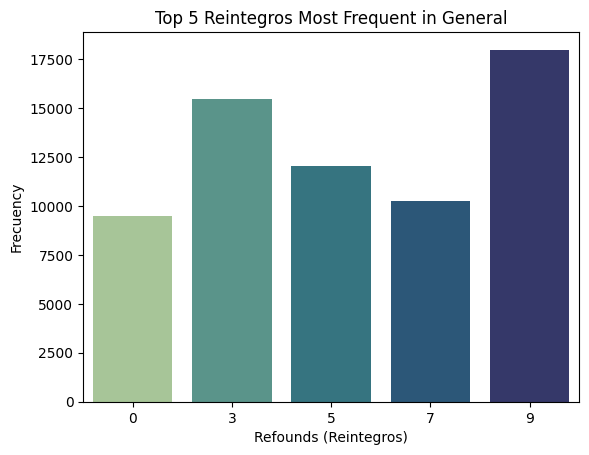

In [42]:
all_reintegros = pd.concat([
    df['reintegro_primer_premio'],
    df['reintegro_segundo_premio'],
    df['reintegro_tercer_premio']
])

def plot_top_5_reintegros(column_dataset, plot_title):
    top_5 = column_dataset.value_counts().head(5)
    
    # Create the barplot for the frequency
    sns.barplot(x=top_5.index, y=top_5.values, palette='crest', hue=top_5.index, legend=False)
    plt.title(plot_title)
    plt.xlabel("Refounds (Reintegros)")
    plt.ylabel("Frecuency")
    plt.show()

plot_top_5_reintegros(df['reintegro_primer_premio'], 'Top 5 Reintegros (Primer Premio)')
plot_top_5_reintegros(df['reintegro_segundo_premio'], 'Top 5 Reintegros (Segundo Premio)')
plot_top_5_reintegros(df['reintegro_tercer_premio'], 'Top 5 Reintegros (Tercer Premio)')
plot_top_5_reintegros(all_reintegros, 'Top 5 Reintegros Most Frequent in General')

## From all numbers sold, what is the percentage of winning numbers by Lottery? 

## (Ordario and Extraordinario)

In [43]:
def calculate_winning_percentage(total_issued, winning_numbers):
    '''
    Calculate the percentage of winning numbers sold vs not sold.
    
    Parameters:
        total_issued (int): total number of tickets issued for that draw type
        winning_numbers (int): total winning numbers of each draw type
        
    Returns:
        dict: A dictionary with total numbers, numbers winning, losing, and their percentages.
    '''
    
    losing_numbers = total_issued - winning_numbers
    
    return {
        'total_issued': total_issued,
        'total_winning_numbers': winning_numbers,
        'losing_numbers': losing_numbers,
        'percentage_winning': round((winning_numbers / total_issued) * 100, 2),
        'percentage_lossing': round((losing_numbers / total_issued) * 100, 2)
    }

def calculate_odds (percentage_winning_numbers):
    '''
    Calculate the odds based on the percentage of winning numbers.
    Returns the odds as a ratio (1 in X)
    '''
    
    if percentage_winning_numbers == 0:
        return 'No odds (0%)'
    return round(100 / percentage_winning_numbers)

#### Extract relevant data for this calc

The lotery **'ordinario'** normaly sales up to **80,000 tickets**

The **'extraodinario'** can sale up to **90,000 tickets** (in special editions they can sale up to **100,000+** tickets).

In [44]:
# Numbers of tickets issued on each ORDINARIO and EXTRAORDINARIO draw.
tickets_issued_ordinario = 80_000
tickets_issued_extraordinario = 90_000

# Create datasets for ORDINARIOS and EXTRAORDINARIOS
df_ordinarios = df[df['tipo_sorteo'] == 'ORDINARIO']
df_extraordinarios = df[df['tipo_sorteo'] == 'EXTRAORDINARIO']

# Calculate how many unique sorteos ORDINARIOS and EXTRAORDINARIOS we have on each dataset
total_sorteos_ordinarios = df_ordinarios['numero_sorteo'].nunique() 
total_sorteos_extraordinarios = df_extraordinarios['numero_sorteo'].nunique()

# Calculate total of winning numbers for ORIDINARIOS and EXTRAORDINARIOS draws we have in total
total_winners_by_sorteo_ordinario = df_ordinarios['numero_premiado'].count().sum()
total_winners_by_sorteo_extraordinario = df_extraordinarios['numero_premiado'].count().sum()

# Calculate the total of numbers issued for ORDINARIO and EXTRAORDINARIO draws
total_numbers_issued_ord = tickets_issued_ordinario * total_sorteos_ordinarios
total_numbers_issued_extraord = tickets_issued_extraordinario * total_sorteos_extraordinarios

print(f"At this moment we have a total of {total_sorteos_ordinarios:,} ORDINARIOS draws.")
print(f"At this moment we have a total of {total_sorteos_extraordinarios:,} EXTRAORDINARIOS draws. \n")

print(f"Currently we have a total of {total_winners_by_sorteo_ordinario:,} of winning numbers in all the recorded ORDARIO draws.")
print(f"Currently we have a total of {total_winners_by_sorteo_extraordinario:,} of winning numbers in all the recorded EXTRAORDARIO draws. \n")
# print(f"total winning numbers: {total_winners_by_sorteo_ordinario + winners_by_sorteo_extraordinario} equals to the lenthg of the full dataset: {len(df)}")

print(f"Total numbers issued for ORDINARIO draws: {total_numbers_issued_ord:,}")
print(f"Total numbers issued for EXTRAORDINARIO draws: {total_numbers_issued_extraord:,}")

At this moment we have a total of 25 ORDINARIOS draws.
At this moment we have a total of 7 EXTRAORDINARIOS draws. 

Currently we have a total of 21,863 of winning numbers in all the recorded ORDARIO draws.
Currently we have a total of 12,080 of winning numbers in all the recorded EXTRAORDARIO draws. 

Total numbers issued for ORDINARIO draws: 2,000,000
Total numbers issued for EXTRAORDINARIO draws: 630,000


#### Calculate percentage and odds of winning numbers for both ORDINARIO and EXTRAORDINARIO

In [45]:
# Percentage and odds of winning numbers in ORDINARIO
percentage_ordinario = calculate_winning_percentage(total_numbers_issued_ord, total_winners_by_sorteo_ordinario)
percentage_ordinario_winning = percentage_ordinario['percentage_winning']
percentage_ordinario_losing = percentage_ordinario['percentage_lossing']
odds_ordinario_winning = calculate_odds(percentage_ordinario_winning)

# Percentage of winning numbers in EXTRAORDINARIO
percentage_extraordinario = calculate_winning_percentage(total_numbers_issued_extraord,total_winners_by_sorteo_extraordinario)
percentage_extraordinario_winning = percentage_extraordinario['percentage_winning']
percentage_extraordinario_losing = percentage_extraordinario['percentage_lossing']
odds_extraordinario_winning = calculate_odds(percentage_extraordinario_winning)

print(f"In the ORDINARIO draws the percentage of winning some money are: {percentage_ordinario_winning}% and the losing numbers are {percentage_ordinario_losing}%")
print(f"In the ORDINARIO draws the percentage of winning some money are: {percentage_extraordinario_winning}% and the losing numbers are {percentage_extraordinario_losing} \n")

print(f"The odds of winning some money in a ORDINARIO draw are 1 in {odds_ordinario_winning}")
print(f"The odds of winning some money in a EXTRAORDINARIO draw are 1 in {odds_extraordinario_winning}")

In the ORDINARIO draws the percentage of winning some money are: 1.09% and the losing numbers are 98.91%
In the ORDINARIO draws the percentage of winning some money are: 1.92% and the losing numbers are 98.08 

The odds of winning some money in a ORDINARIO draw are 1 in 92
The odds of winning some money in a EXTRAORDINARIO draw are 1 in 52


### Graph percentage of winning numbers and odds in ORDINARIO and EXTRAORDINARIO

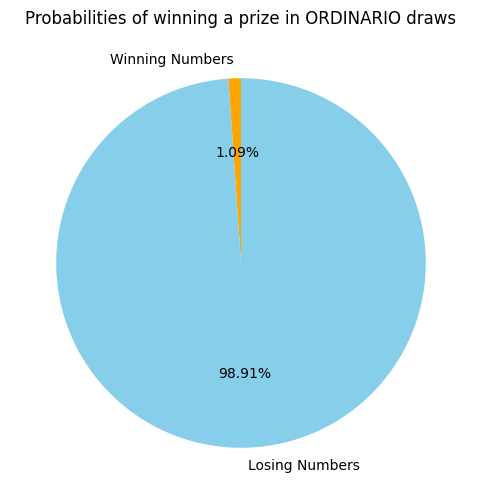

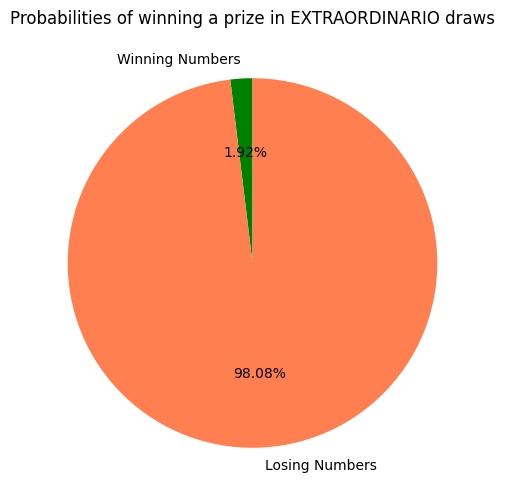

In [46]:
labels = ['Winning Numbers', 'Losing Numbers']

probabilities_ord = [percentage_ordinario_winning, percentage_ordinario_losing]
colors_ord = ['orange', 'skyblue']

probabilities_extraord = [percentage_extraordinario_winning, percentage_extraordinario_losing]
colors_extraord = ['green', 'coral']

# Create graph ORDINARIO
plt.figure(figsize=(6,6))
plt.pie(probabilities_ord, labels=labels, autopct='%1.2f%%', startangle=90, colors=colors_ord)
plt.title("Probabilities of winning a prize in ORDINARIO draws")
plt.show()

# Create graph EXTRAORDINARIO
plt.figure(figsize=(6,6))
plt.pie(probabilities_extraord, labels=labels, autopct='%1.2f%%', startangle=90, colors=colors_extraord)
plt.title("Probabilities of winning a prize in EXTRAORDINARIO draws")
plt.show()

#### This is for winning some money, not even the big prize:

So, answering the question: the percentage of winning numbers for ORDINARIOS draws is **1.14%** and for EXTRAORDINARIOS is **1.86%** something that basically means that in the ORDINARIO draw your chances of winning a prize is **1 in 88** meanwhile in an EXTRAODINARIO one the chances are **1 in 54**, so you have slightly more chances of winning some money in an EXTRAORDINARIO draw. 

## From all winning numbers, how many were actually sold? 

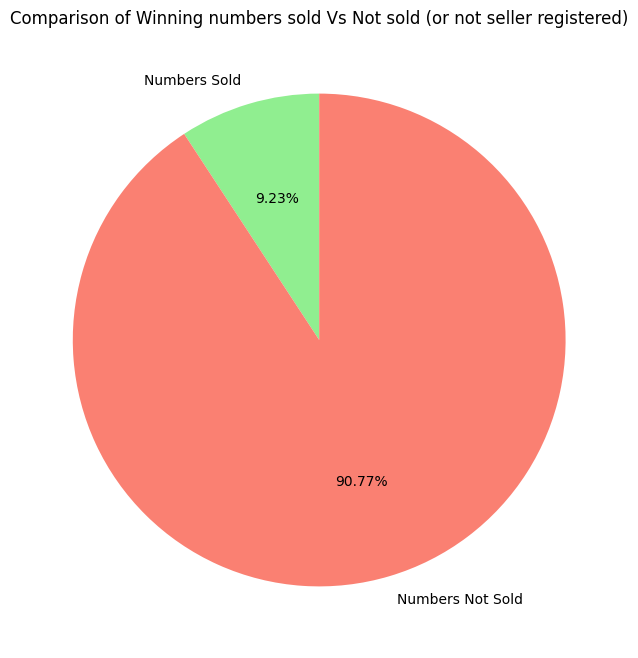

In [47]:
"""
By calculating the total rows in `df_filtered_vendedor_city_department` and the total rows in `df` (the full dataset) 
We'll see what is the percentage of winning numbers sold vs the not sold
"""

# Calculate totals 
total_number = len(df) # total rows of the full dataset
numbers_sold = len(df_filtered_vendedor_city_department) # total rows of numbers sold
numbers_not_sold = total_number - numbers_sold

# Setup for graphs
labels = ['Numbers Sold', 'Numbers Not Sold']
sizes = [numbers_sold, numbers_not_sold]
colors = ['lightgreen', 'salmon']

# Create pie chart 
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=colors)
plt.title("Comparison of Winning numbers sold Vs Not sold (or not seller registered)")
plt.show()

**So what does this mean?** 

For sure the chances of getting a prize are barely minimum, on top of that, on average, **only the 8% of the winning number are actually sold.** this making the profit gap of loteria santa lucia a bit better

## Profit and expenses of Loteria Santa Lucia

### Profit distribution of Loteria Santa Lucia: 

- 65% for prize payments and refunds.
- 16% discount for wholesale buyers who sell Loteria Santa Lucia tickets.
- 5% for the operating expenses of Loteria Santa Lucia.
- 14% for the economic sustainability of the programs and services of the Benemérito Comité Pro Ciegos y Sordos de Guatemala. 

[Loteria Santa Lucia](https://loteria.org.gt/site/about-us)

The price of the full tickets works as follows: 

1 "cachito" is a piece of 10, 10 "cachitos" make a full ticket.

Q7.00 by "cachito" or **Q70 the full ticket** when the big prize is **less than Q2,200,000**

Q15.00 by "cachito" or **Q150 the full ticket** when the big prize is **equal or more than Q2,200,000**

Q25.00 by "cachito" or **Q250 the full ticket** when the big prize is **equal or more than Q4,000,000**

Q30.00 by "cachito" or **Q300 the full ticket** when the big prize is **equal or more than Q6,000,000**

Q35.00 by "cachito" or **Q350 the full ticket** when the big prize is **equal or more than Q7,000,000**

The lotteries **ORDINARIO** are the ones that cost Q70.00 the full ticket, **EXTRAORDINARIO** ones are from Q15.00 up to Q35.00 or more.

[Loteria Santa Lucia Prices](https://loteria.org.gt/site/index)

In [48]:
def ticket_price(monto_premio):
    if monto_premio < 2_200_000:
        return 70 # Price by default, this should not happend in "extraordinarios"
    elif monto_premio >= 2_200_000 and monto_premio < 4_000_000:
        return 150
    elif monto_premio >= 4_000_000 and monto_premio < 6_000_000:
        return 250
    elif monto_premio >= 6_000_000 and monto_premio < 7_000_000:
        return 300
    elif monto_premio >= 7_000_000:
        return 350

In December 2024 Loteria Santa Lucia made public that they do the lottery once the reach the [80% of tickets sold](https://loteria.org.gt/site/raffle). This in order to be profitable and avoid losses of money. Based on **"Código Civil Decreto Ley Número 106, Artículo 2139"** of the [Guatemalan law.](https://www.oas.org/dil/esp/codigo_civil_guatemala.pdf)